In [1]:
import sys
sys.path.append('../')

from src.m4_generator import M4Generator
from src.m4_data_loader import M4DataLoader
from src.error_functions import smapetf
from src.visualization import *
from src.evaluation import evaluate_model
from src.m4_model import M4Model


import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

Using TensorFlow backend.


In [2]:
EPOCHS = 100
BATCH_SIZE = 50
LOOKBACK = 100
HORIZON = 48
HIDDEN_LAYER_SIZE = 100
LOSS = 'mae'

data_loader = M4DataLoader("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  LOOKBACK, HORIZON,  validation_ratio=0.05)

train_x, train_y = data_loader.get_training_data()
test_x, test_y = data_loader.get_test_data()
validate_x, validate_y = data_loader.get_validation_data()

training_data_generator = M4Generator(train_x, train_y, BATCH_SIZE)
test_data_generator = M4Generator(test_x, test_y, BATCH_SIZE)
validation_data_generator = M4Generator(validate_x, validate_y, BATCH_SIZE)

model = M4Model(hidden_layer_size=HIDDEN_LAYER_SIZE, batch_size=BATCH_SIZE, lookback=LOOKBACK, 
        horizon=HORIZON, learning_rate=0.001, loss = LOSS, dropout_ratio = 0.3)

model.train(training_data_generator, test_data_generator, epochs=EPOCHS)

hist = model.evaluate(validation_data_generator)
print(hist)
#model.save('../models')

Epoch 1/100
60/60 [==============================] - 21s 344ms/step - loss: 0.1278 - val_loss: 0.2308
Epoch 2/100
60/60 [==============================] - 19s 318ms/step - loss: 0.0881 - val_loss: 0.2675
Epoch 3/100
60/60 [==============================] - 19s 318ms/step - loss: 0.0773 - val_loss: 0.2611
Epoch 4/100
60/60 [==============================] - 19s 319ms/step - loss: 0.0707 - val_loss: 0.2362
Epoch 5/100
60/60 [==============================] - 19s 317ms/step - loss: 0.0648 - val_loss: 0.2652
Epoch 6/100
60/60 [==============================] - 19s 317ms/step - loss: 0.0604 - val_loss: 0.2700
Epoch 7/100
60/60 [==============================] - 19s 312ms/step - loss: 0.0565 - val_loss: 0.2284
Epoch 8/100
60/60 [==============================] - 20s 331ms/step - loss: 0.0529 - val_loss: 0.2240
Epoch 9/100
60/60 [==============================] - 20s 341ms/step - loss: 0.0511 - val_loss: 0.2112
Epoch 10/100
60/60 [==============================] - 22s 361ms/step - loss: 0.049

60/60 [==============================] - 18s 298ms/step - loss: 0.0400 - val_loss: 0.2419
Epoch 81/100
60/60 [==============================] - 18s 302ms/step - loss: 0.0391 - val_loss: 0.2545
Epoch 82/100
60/60 [==============================] - 18s 300ms/step - loss: 0.0398 - val_loss: 0.2413
Epoch 83/100
60/60 [==============================] - 18s 292ms/step - loss: 0.0398 - val_loss: 0.2471
Epoch 84/100
60/60 [==============================] - 17s 291ms/step - loss: 0.0390 - val_loss: 0.2375
Epoch 85/100
60/60 [==============================] - 19s 319ms/step - loss: 0.0390 - val_loss: 0.2466
Epoch 86/100
60/60 [==============================] - 18s 292ms/step - loss: 0.0392 - val_loss: 0.2632
Epoch 87/100
60/60 [==============================] - 18s 296ms/step - loss: 0.0391 - val_loss: 0.2438
Epoch 88/100
60/60 [==============================] - 18s 296ms/step - loss: 0.0388 - val_loss: 0.2282
Epoch 89/100
60/60 [==============================] - 18s 296ms/step - loss: 0.0392 - 

In [ ]:

#=================== Evaluate Model
#model = M4Model(batch_size=BATCH_SIZE)
#model.load('../models/10/architecture.json','../models/10/weights.h5')

#model.compile()
#hist = model.train(gen, epochs=EPOCHS)

#gen = M4Generator("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  #48, 48, 100)

#train_x, train_y, test_x, test_y = gen.get_data()

train_error = evaluate_model(model, train_x, train_y, smapetf)
print(train_error)

test_error = evaluate_model(model, test_x, test_y, smapetf)
print(test_error)


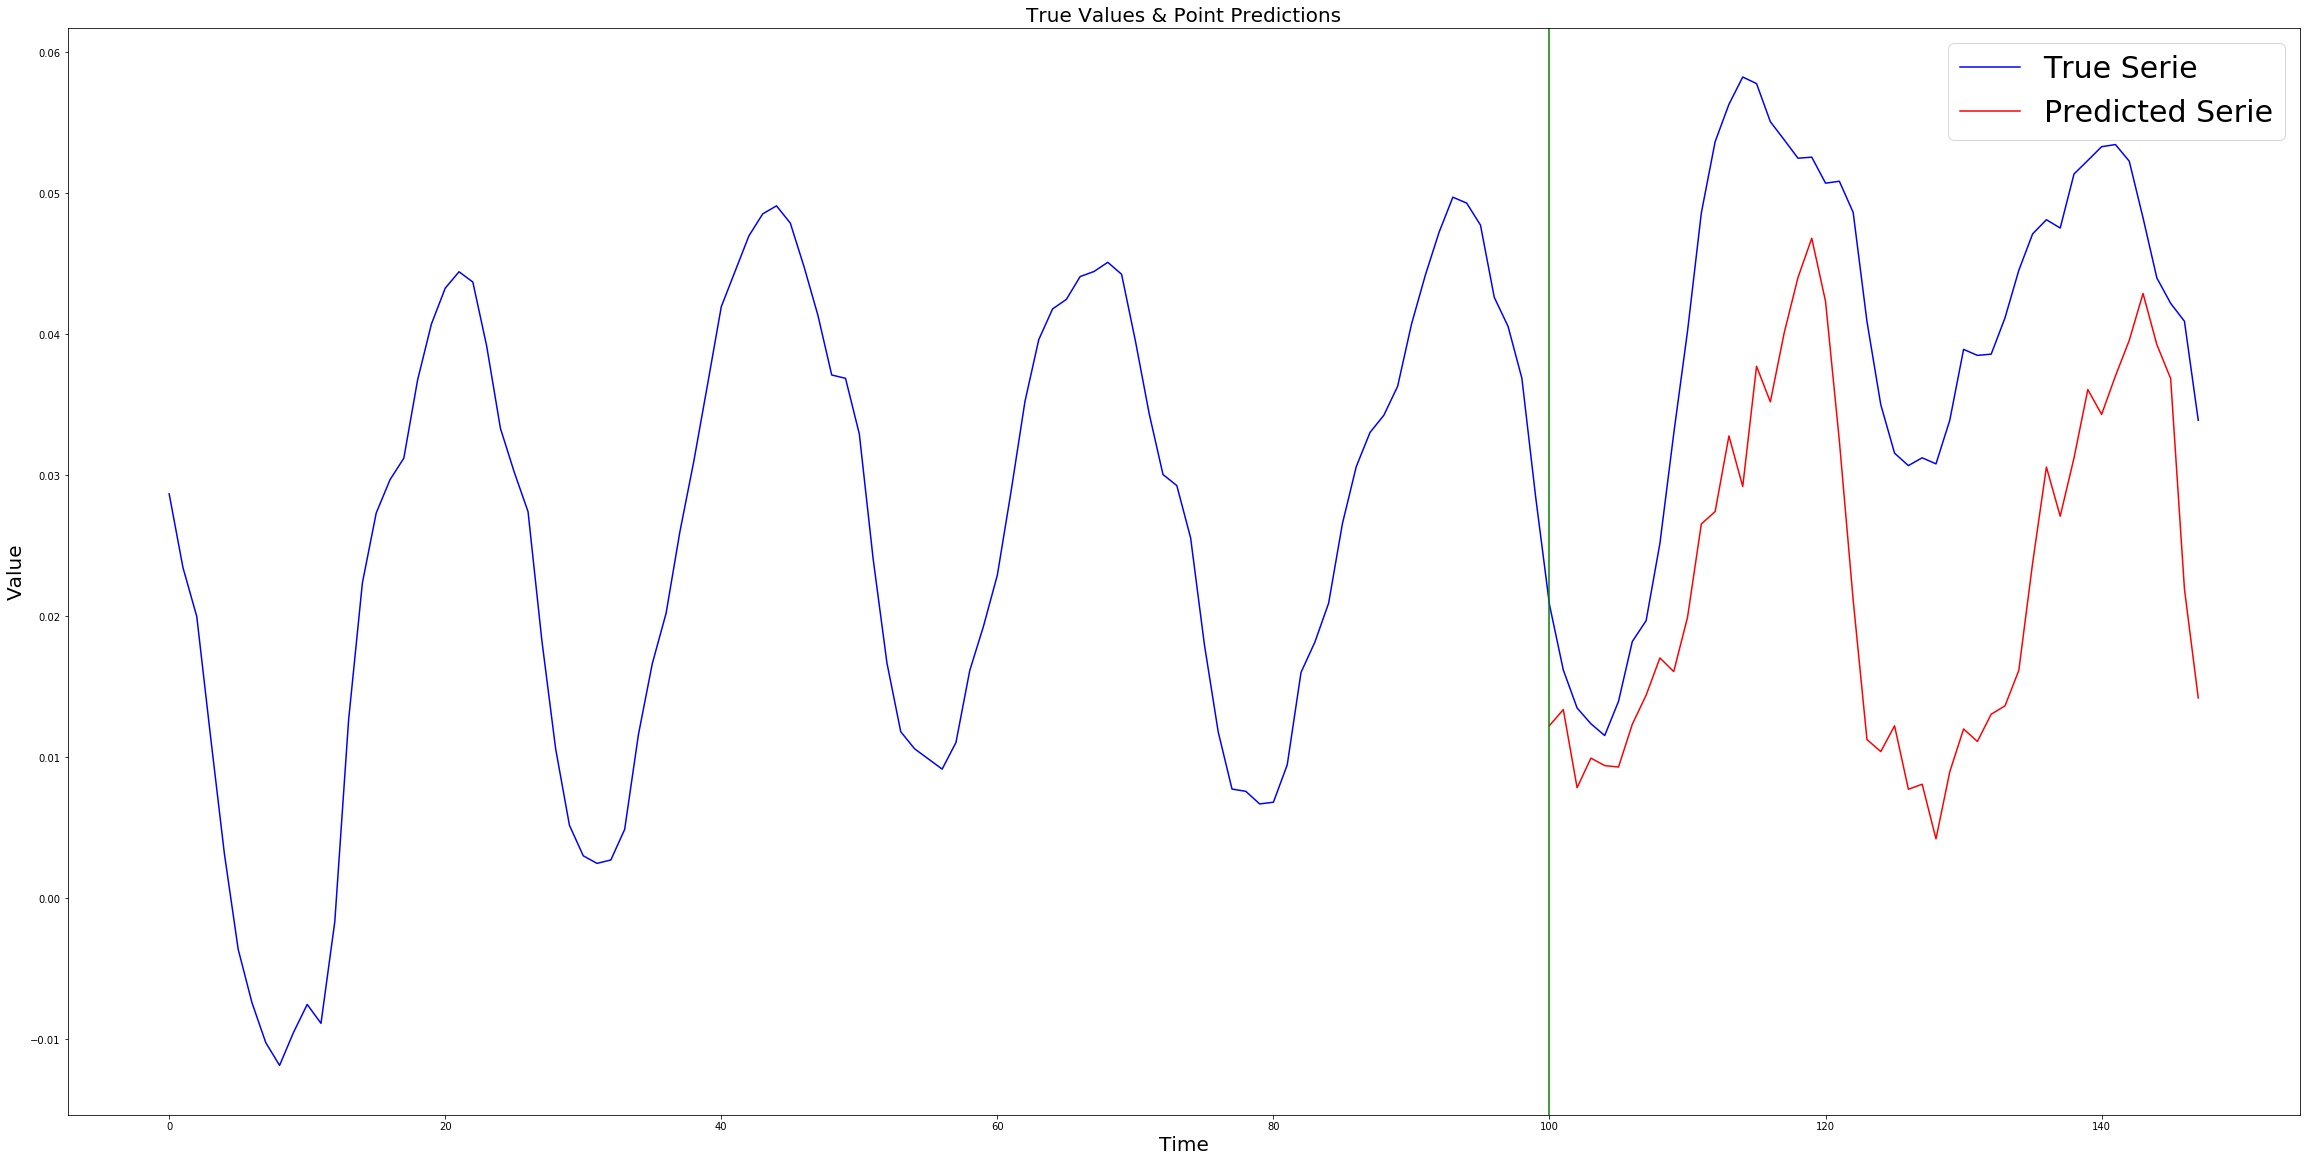

In [19]:
IDX = 11
X = test_x
Y = test_y
#============ Predict Train
predictedY = model.predict(X[:BATCH_SIZE,:,:])[:,:HORIZON]

#plot_series(train_x, train_y, predictedY, series_num=10)
plot_serie_and_prediction(X[:,:,0], Y[:,:HORIZON], predictedY, serie_indx=IDX)

#============ Predict Test
#predictedY = model.predict(test_x[:BATCH_SIZE,:,:])[:,:HORIZON]

#plot_series(test_x, test_y, predictedY, series_num=10)
#plot_serie_and_prediction(test_x[:,:,0], test_y[:,:HORIZON], predictedY, serie_indx=IDX)

In [ ]:
from utils import exponential_smoothing

gen = M4Generator("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  640, HORIZON, BATCH_SIZE)
train_x, train_y, test_x, test_y = gen.get_data()

yPred =  np.empty(shape=[0, HORIZON])
for data in test_x:
    pred = exponential_smoothing(data)
    yPred = np.vstack((yPred, pred))

print(yPred.shape)

In [ ]:
IDX = 0
print( smapetf(test_y, yPred))
plot_serie_and_prediction(test_x, test_y, yPred, serie_indx=IDX)